## 掛接 Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
import cv2
import tensorflow_datasets as tfds
import tensorflow.keras.layers as layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16
from tqdm import tqdm,trange

## 載入資料(第一次才需要)

In [ ]:
# 確認壓縮檔路徑
filepath='/content/drive/MyDrive/Colab Notebooks/'
os.listdir(filepath)

In [ ]:
# # 解壓縮檔案
# !unzip '/content/drive/MyDrive/20222電機系電腦視覺/HW3/stanford_dogs.zip' -d '/content/drive/MyDrive/20222電機系電腦視覺/HW3/'

# !unzip '/content/drive/MyDrive/Colab Notebooks/2022hw3.zip' -d '/content/drive/MyDrive/Colab Notebooks/'
!unzip '/content/drive/MyDrive/Colab Notebooks/train.zip' -d '/content/drive/MyDrive/Colab Notebooks/Lunch/'
# !unzip '/content/drive/MyDrive/Colab Notebooks/Lunch/test.zip' -d '/content/drive/MyDrive/Colab Notebooks/Lunch/'

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/test_convert.zip' -d '/content/drive/MyDrive/Colab Notebooks/Lunch/'

## 到資料路徑

In [ ]:
# dirpath='/content/drive/MyDrive/Colab Notebooks/stanford_dogs/stanfor_dogs/'
dirpath='/content/drive/MyDrive/Colab Notebooks/Lunch/'
os.listdir(dirpath) 

['test',
 'train.zip',
 'test.zip',
 'train',
 'train_convert',
 'test_convert',
 'checkpoint']

## 資料前處理(改成local端處理) 附上code

In [ ]:
# 處理warning
# UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
from PIL import Image
def center_crop(img, dim):
    width, height = img.shape[1], img.shape[0]

    # process crop width and height for max available dimension
    crop_width = dim[0] if dim[0] < img.shape[1] else img.shape[1]
    crop_height = dim[1] if dim[1] < img.shape[0] else img.shape[0]
    mid_x, mid_y = int(width / 2), int(height / 2)
    cw2, ch2 = int(crop_width / 2), int(crop_height / 2)
    crop_img = img[mid_y - ch2:mid_y + ch2, mid_x - cw2:mid_x + cw2]
    return crop_img

    
# file = 'D:/bridge_crack_testII/test/val/result16675/image'
file = 'D:/CVDL_final/train/49'
result = [f for f in os.listdir(file) if os.path.isfile(os.path.join(file, f))]
# outdir = "N:/trainingtest1231/SegmentationClass2/"
# outdir = os.listdir(outdir)

#print(result)
    
read_directory(file)
i=0

for im in array_of_image:
    # im_g = access_pixels(im)
    im_g = cv.cvtColor(im, cv.COLOR_RGBA2RGB)
    im_g = center_crop(im_g, (224, 224))
    output = "D:/CVDL_final/train_convert/49/" + result[i]
    cv.imwrite(output, im_g)
    # cv.imwrite( result[i], im_g, [cv.IMWRITE_PNG_COMPRESSION, 0]) code
    i += 1

### 檢查轉換後的影像

In [ ]:
array_of_image = []
def read_directory(directory_name):   
  for filename in os.listdir(directory_name):
      # print(directory_name + "/" + filename) #just for test
      #img is use to store the image data
      img = cv2.imread(directory_name + "/" + filename)
      # print(img)
      array_of_image.append(img)
      # print(img)
      # print(array_of_image)

file = '/content/drive/MyDrive/Colab Notebooks/Lunch/test_convert/三杯雞'
read_directory(file)
print(len(array_of_image))

127


## Load data

In [ ]:
imgSize=(224,224)
imgShape=(224,224,3)
batchSize=32 #32, 改設1去檢查影像

# train generator
trainDataGenerator = ImageDataGenerator(rescale = 1/255,
                      # augmentation
                      rotation_range = 20,
                      shear_range = 0.1,
                      # zoom_range = 0.1,
                      width_shift_range= 0.2,
                      height_shift_range= 0.2,
                      horizontal_flip=True,
                      vertical_flip=True,
                      validation_split=0.3
                      )

# valDataGenerator = ImageDataGenerator(rescale=1/255,validation_split=0.2)

trainBatch = trainDataGenerator.flow_from_directory(
    directory = dirpath+'train_convert',
    target_size = imgSize,
    class_mode = 'categorical',
    shuffle = True,
    batch_size = batchSize,
    subset='training'
)

valBatch = trainDataGenerator.flow_from_directory(
    directory = dirpath+'train_convert',
    target_size = imgSize,
    class_mode = 'categorical',
    shuffle = True,
    batch_size = batchSize,
    subset='validation'
)

# test generator
# testDataGenerator = ImageDataGenerator(rescale=1/255)

# # testBatch = testDataGenerator.flow_from_directory(
# #     # dirpath,
# #     directory = dirpath+'test',
# #     class_mode= 'categorical',
# #     shuffle = False,
# #     batch_size=batchSize,
# #     target_size= imgSize,
# #     subset='validation'
# # )

# testBatch = testDataGenerator.flow_from_directory(
#     directory = dirpath+'test',
#     target_size = imgSize,
#     class_mode = 'categorical',
#     shuffle = False,
#     batch_size = batchSize,
#     # subset='training'
# )


Found 19558 images belonging to 50 classes.
Found 8346 images belonging to 50 classes.


In [ ]:
# test generator
testDataGenerator = ImageDataGenerator(rescale=1/255)

# testBatch = testDataGenerator.flow_from_directory(
#     # dirpath,
#     directory = dirpath+'test',
#     class_mode= 'categorical',
#     shuffle = False,
#     batch_size=batchSize,
#     target_size= imgSize,
#     subset='validation'
# )

testBatch = testDataGenerator.flow_from_directory(
    directory = dirpath+'test_convert',
    target_size = imgSize,
    class_mode = None,
    shuffle = False,
    batch_size = batchSize,
    # subset='training'
)

Found 7001 images belonging to 50 classes.


## 檢查圖片

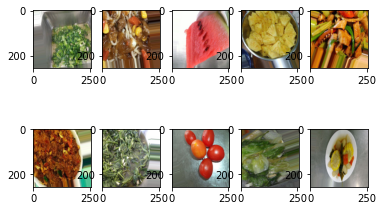

In [ ]:
# print(trainDataGenerator)
# 檢查圖片
for i in range(10):
  # data=trainBatch[i]
  plt.subplot(2,5,i+1)
  data = valBatch.next()
  data = data[0]
  # print(data.shape)
  plt.imshow(np.squeeze(data))
plt.show()

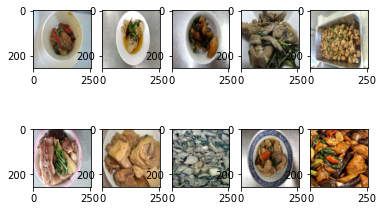

In [ ]:
# print(trainDataGenerator)
# 檢查圖片
for i in range(10):
  # data=trainBatch[i]
  plt.subplot(2,5,i+1)
  data = testBatch.next()
  data = data[0]
  # print(data.shape)
  plt.imshow(np.squeeze(data))
plt.show()

## 載入模型

In [ ]:
# base_model = tf.keras.applications.VGG16(
#     include_top = False,
#     weights = 'imagenet',
#     input_tensor = None,
#     input_shape=imgShape,

# )

base_model = tf.keras.applications.Xception(
    include_top = False,
    weights = 'imagenet',
    input_tensor = None,
    input_shape=imgShape,

)

# base_model = tf.keras.applications.ResNet152V2(
#     include_top = False,
#     weights = 'imagenet',
#     input_tensor = None,
#     input_shape=imgShape,

# )

# base_model = tf.keras.applications.EfficientNetB2(
#     include_top = False,
#     weights = 'imagenet',
#     input_tensor = None,
#     input_shape=imgShape,

# )

# base_model = tf.keras.applications.InceptionResNetV2(
#     include_top = False,
#     weights = 'imagenet',
#     input_tensor = None,
#     input_shape=imgShape,

# )

# base_model = tf.keras.applications.InceptionV3(
#     include_top = False,
#     weights = 'imagenet',
#     input_tensor = None,
#     input_shape=imgShape,

# )

x = base_model.output
# x = layers.Dropout(0.25)(x)
x = layers.GlobalAveragePooling2D()(x)

# x = layers.Flatten()(x)
# x = layers.Dense(units = 1024, activation = 'relu')(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(units = 512, activation = 'relu')(x)
# x = layers.Dropout(0.2)(x)
x = layers.Dense(units = 256, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(units = 128, activation = 'relu')(x)
# x = layers.Dropout(0.2)(x)
output_layer = layers.Dense(units = 50, activation = 'softmax')(x)

# freeze the weight
base_model.trainable = False

model = tf.keras.Model(inputs = base_model.input, outputs = output_layer)

83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
# show the model stucture (截圖用)
# model1 = tf.keras.Sequential([
#     base_model,
#     layers.Dropout(0.25),
#     layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(120, activation="softmax")
# ])
# model1.summary()
model1 = tf.keras.Sequential([
    base_model,
    # layers.Dropout(0.25),
    layers.GlobalAveragePooling2D(),
    # layers.Flatten(),
    # layers.Dense(units = 1024, activation = 'relu'),
    # layers.Dropout(0.5),
    # layers.Dense(units = 512, activation = 'relu'),
    # layers.Dropout(0.2),
    layers.Dense(units = 256, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(units = 128, activation = 'relu'),
    # layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation="softmax")
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 50)                6450      
                                                        

## Define Focal loss

In [ ]:
# multi class focal loss
def multi_category_focal_loss1(alpha, gamma=2.0):
    """
    focal loss for multi category of multi label problem
    適用於多分類或多標籤問題的focal loss
    alpha用於指定不同類別/標籤的權重，數組大小需要與類別個數一致
    當你的數據集不同類別/標籤之間存在偏斜，可以嘗試適用本函數作爲loss
    Usage:
     model.compile(loss=[multi_category_focal_loss1(alpha=[1,2,3,2], gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    epsilon = 1.e-7
    alpha = tf.constant(alpha, dtype=tf.float32)
    #alpha = tf.constant([[1],[1],[1],[1],[1]], dtype=tf.float32)
    #alpha = tf.constant_initializer(alpha)
    gamma = float(gamma)
    def multi_category_focal_loss1_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_t = tf.multiply(y_true, y_pred) + tf.multiply(1-y_true, 1-y_pred)
        # ce = -tf.log(y_t)
        ce = -tf.math.log(y_t)
        weight = tf.pow(tf.subtract(1., y_t), gamma)
        fl = tf.matmul(tf.multiply(weight, ce), alpha)
        loss = tf.reduce_mean(fl)
        return loss
    return multi_category_focal_loss1_fixed

## train model

In [ ]:
# model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

sgd = tf.keras.optimizers.SGD(learning_rate=0.00001, decay=1e-6, momentum=0.9, nesterov=False)
# cross entrophy
# model.compile(optimizer = sgd,
#               loss='categorical_crossentropy',
#               metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5_accuracy', dtype=None)])

# model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.9),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# focal loss
model.compile(optimizer = sgd,
              loss=[multi_category_focal_loss1(alpha=[[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],
                                  [1.4],[1],[1],[1],[1],[1],[1],[1.7],[1],[1],
                                  [1],[1],[1],[1],[1],[1],[1],[1],[1],[1],
                                  [1],[1],[1],[1],[1],[1],[1],[1],[1],[5],
                                  [1],[1],[1],[1],[1],[1],[1],[1],[1],[1],], gamma=2)],
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5_accuracy', dtype=None)])

In [ ]:
epoch=10

history = model.fit(
  trainBatch,
  steps_per_epoch = trainBatch.samples // batchSize,
  validation_data = valBatch,
  validation_steps = valBatch.samples // batchSize,
  epochs=epoch,
)

Epoch 1/10
611/611 [==============================] - 6868s 11s/step - loss: 1.2266 - accuracy: 0.5373 - top5_accuracy: 0.8737 - val_loss: 1.1203 - val_accuracy: 0.5716 - val_top5_accuracy: 0.8882
Epoch 2/10
611/611 [==============================] - 4740s 8s/step - loss: 1.2211 - accuracy: 0.5368 - top5_accuracy: 0.8769 - val_loss: 1.1007 - val_accuracy: 0.5724 - val_top5_accuracy: 0.8958
Epoch 3/10
 21/611 [>.............................] - ETA: 49:47 - loss: 1.2913 - accuracy: 0.5077 - top5_accuracy: 0.8576

KeyboardInterrupt: ignored

## Save model

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Lunch/checkpoint/0617_2/0617_2.weight"

In [ ]:
# 儲存權重
model.save_weights(checkpoint_path, save_format='tf')

In [ ]:
# 再度使用
model.load_weights(checkpoint_path)
weights = model.get_weights()  # Retrieves the state of the model.
model.set_weights(weights)  # Sets the state of the model.

## show the loss & accuracy curve

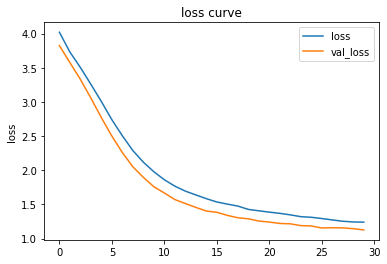

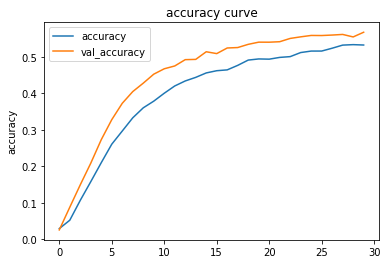

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

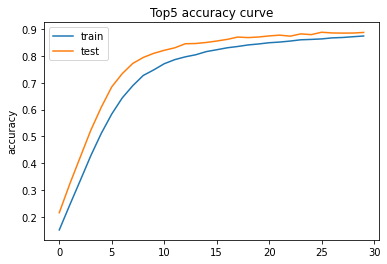

In [ ]:
plt.plot(history.history['top5_accuracy'],label='train')
plt.plot(history.history['val_top5_accuracy'],label='test')
plt.title('Top5 accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

pred = model.predict(testBatch, 50)
pred_result = np.argmax(pred, axis=1)

In [ ]:
test_label2=testBatch.classes
print(len(test_label2))
print(test_label2)

7001
[ 0  0  0 ... 49 49 49]


In [ ]:
# on-hot label
from tensorflow.keras.utils import to_categorical

test_label2=to_categorical(test_label2)
print(test_label2)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


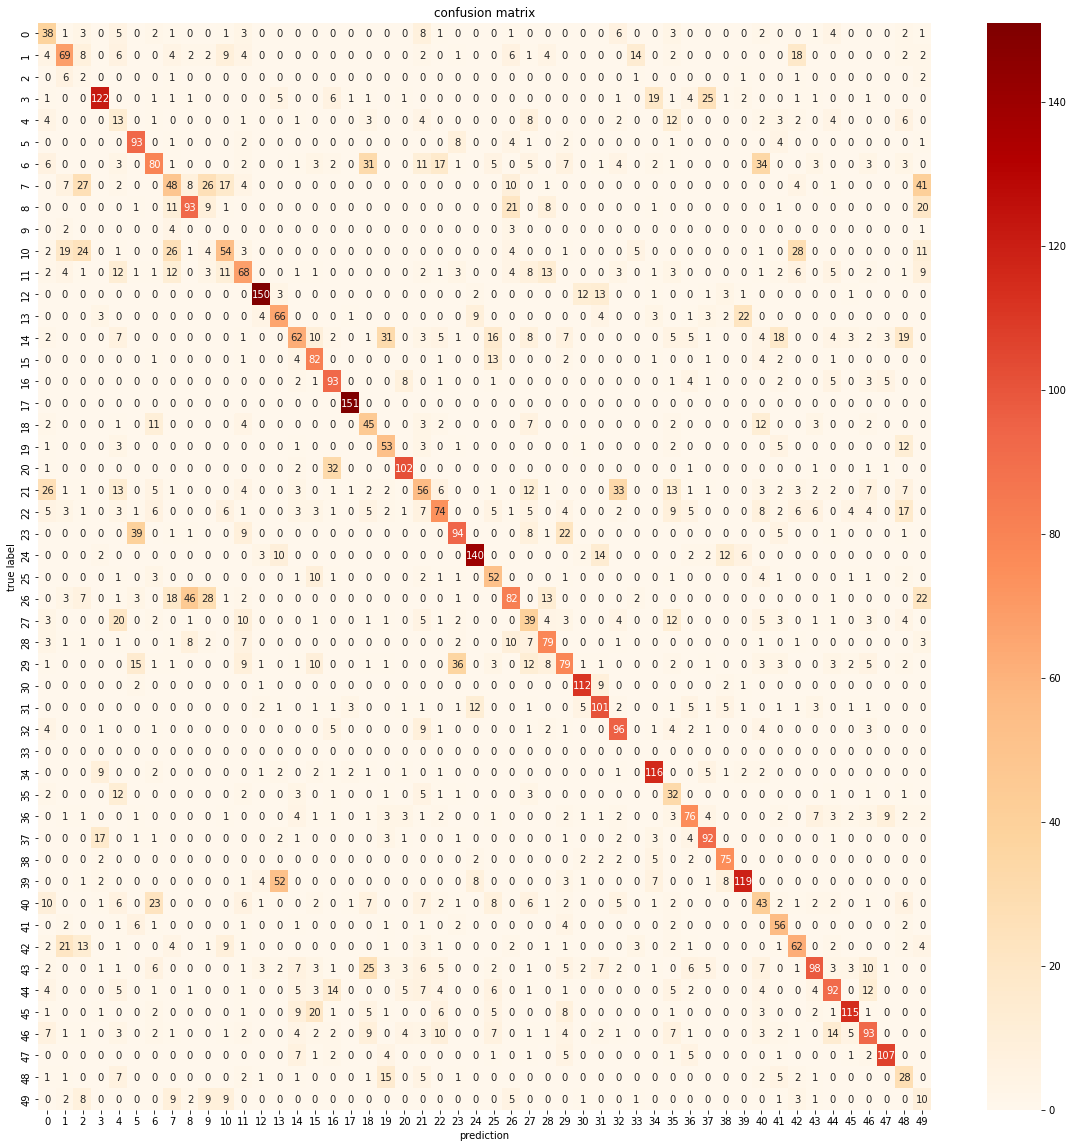

In [ ]:
cm = confusion_matrix(pred_result, np.argmax(test_label2,axis=1))

fit=plt.figure(figsize=(20,20))
plt.title('confusion matrix')
sn.heatmap(cm,annot=True,cmap='OrRd',fmt='g')
plt.xlabel('prediction')
plt.ylabel('true label')
plt.show()

## (final 不用執行)**predict test data

In [ ]:
prediction = model.predict(testBatch)
prediction

array([[8.8211782e-05, 3.0653994e-03, 6.9523405e-04, ..., 1.3793380e-07,
        5.8111522e-07, 1.0944901e-06],
       [4.7877507e-05, 9.8677152e-01, 3.2218108e-05, ..., 6.0850084e-08,
        1.3399092e-06, 8.5655483e-06],
       [4.9705852e-07, 3.2123701e-06, 3.5710701e-07, ..., 4.5192896e-06,
        1.6239239e-05, 1.2554319e-04],
       ...,
       [1.2968446e-06, 4.2468139e-07, 6.3236081e-07, ..., 4.6468617e-07,
        1.6564528e-06, 1.8554354e-07],
       [8.2328035e-07, 3.4445652e-06, 3.8617778e-05, ..., 7.8648172e-06,
        1.9451265e-05, 2.5758936e-05],
       [1.4077998e-06, 1.8166544e-06, 2.6249953e-07, ..., 4.5055517e-06,
        8.9912191e-06, 1.5604605e-04]], dtype=float32)

## (final 不用執行)輸出結果

In [ ]:
prediction_label=prediction.argmax(axis=1)
filename=testBatch.filenames
outputdf=pd.DataFrame()
outputdf['Name']=filename
outputdf['Label']=prediction_label
outputdf = outputdf.sort_values(by=['Name'])
outputdf.to_csv('/content/drive/MyDrive/Colab Notebooks/stanford_dogs/prediction.csv',index=False)